# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

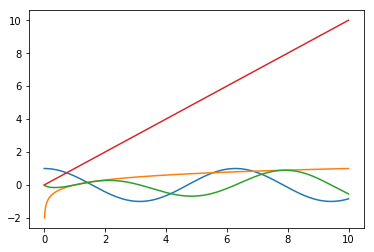

In [9]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.cos(x), x, np.log10(x), x, np.sin(x) * np.log10(x), x, x)

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

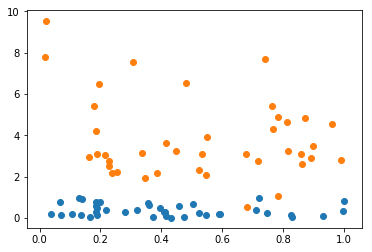

In [11]:
x_normal = np.random.rand(40)
y_normal = np.random.rand(40)
plt.scatter(x_normal,y_normal)

z_normal = np.random.rand(40)
g_gamma = np.random.gamma(4, 1, 40)
plt.scatter(z_normal, g_gamma)

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [12]:
df = pd.read_csv('bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

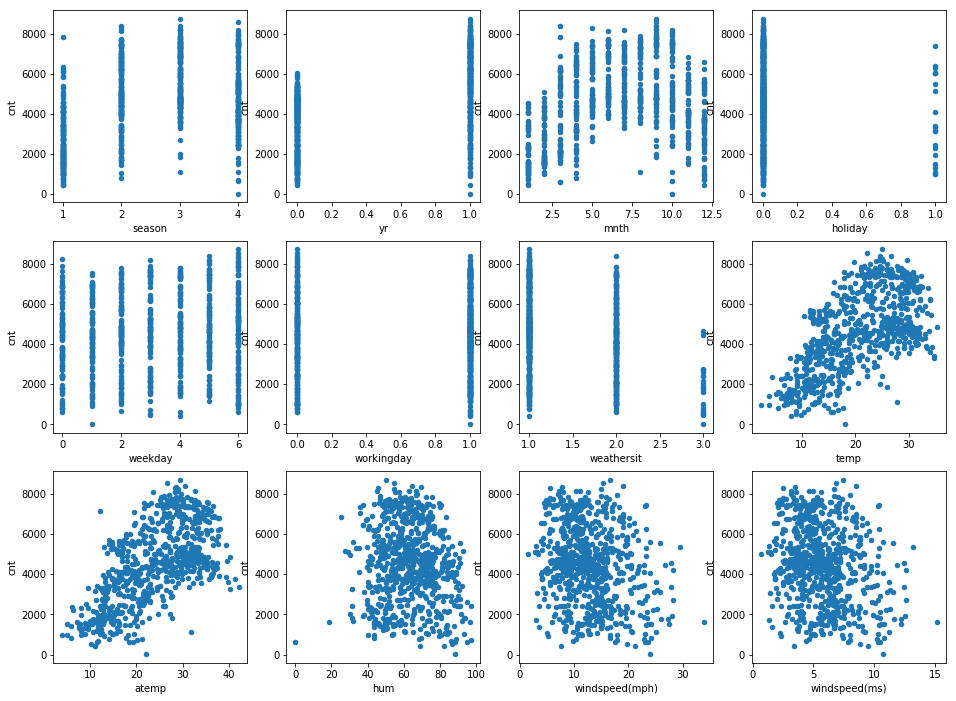

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: Среднее количество прокатов увеличивается к июню, видимо, в связи с самыми подходящими условиями для велопробегов, и дальше начинает постепенно спадать. Так же можно отметить, что несмотря на популярность прокатов в июне, максимальное количество прокатов за все время было зафиксированно в сентябре.
       Наиболее минимальными по среднему значению количества прокатов считаются декабрь и январь, в связи с холодным временем года. Однако, самое минимальное количество заказов было зафиксированно в октябре
       В середине года (лето) величина имеет значительно меньший разброс, чем в другое время года

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: Просматривается линейная зависимость от температуры (temp), а так же от ощущаемой темературы (atemp)

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: Меньше всего количество прокатов (cnt) коррелирует с holiday(-0,1), weekday(0,1), workingday(0,1) и hum (0,1) - коэффициент корреляции стремиться к 0.
       Больше всего количество прокатов (cnt) коррелирует с yr(0,6), temp(0,6), atemp(0,6) - коэффициент корреляции по модулю стремится к 1

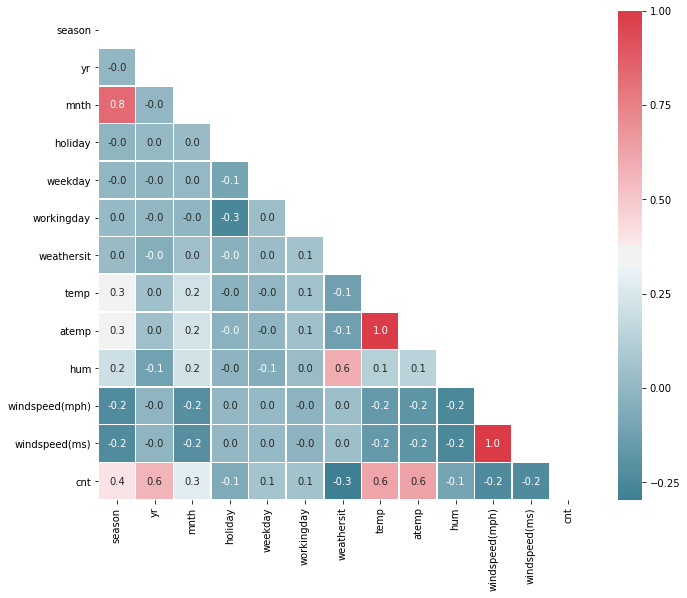

In [15]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Количество прокатов на месяц, согласно данным второго года, значительно выше, чем количество прокатов, приходящимся на первый год. Таким образом, корелляция количества прокатов от года в данной выборке достаточно высоко. Однако, если бы в выборке было больше годов, то коэффициент корелляции был бы значительно ниже (и скорее всего, стремился бы к 0)

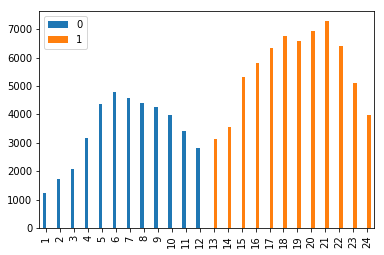

In [35]:
selectionCntArea = df.pivot_table('cnt', index='yr', columns='mnth')
firstYear = pd.DataFrame(selectionCntArea.ix[0])
secondYear = pd.DataFrame(selectionCntArea.ix[1])
secondYear.index += 12

df_concat = pd.concat([firstYear, secondYear], 1)
df_concat.plot.bar()

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Данные собирались почти каждый день равномерно (незначительное количество просадок в 2-5)
    
Ответ: Равномерное распределение

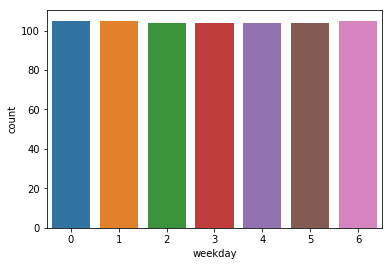

In [39]:
sns.countplot(x = "weekday", data = df)

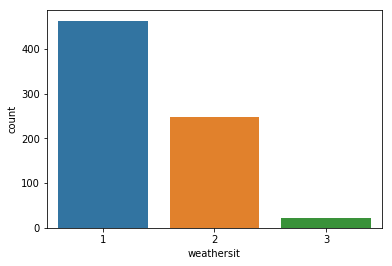

In [41]:
sns.countplot(x = "weathersit", data = df)

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: ~4500

Ответ: Нормальное распределение

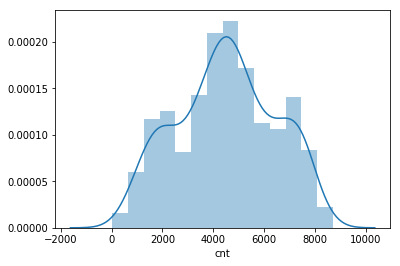

In [45]:
sns.distplot(df.cnt)

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Корреляция признаков стремится к 1, однако на графике явно виден по меньшей мере один выброс. Возможно это были особые условия среды или просто какая-то неправильная запись

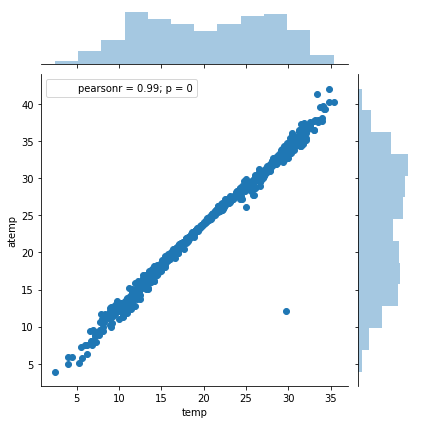

In [49]:
sns.jointplot("temp", "atemp", data = df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: январь-март - количество прокатов в будние дни значительно выше, т.к. в основном нет отдыхающих в это время
       
       апрель-июнь - многие люди уезжают на отдых или планируют свой отдых в других местах. Поэтому необходимость в велопрокате в будние дни падает. Тем не менее, в связи с увеличением свободных людей летом (отпуск, каникулы), значение общего числа проката возрастает
       
       июль-август - отпуска кончаются, люди возвращаются домой из других стран/деревень/etc. Количество прокатов не падает, т.к. люди все еще свободны, ибо отпуска в основном закончатся к следующим месяцам
       
       сентябрь - практически равные характеристики. В связи с теплым климатом, велосипеды все еще пользуются популярностью, однако будние дни люди чаще проводят за работой, чем катаясь на велосипедах
       
       октябрь-декабрь - значительный спад востребованности проката в связи с похолоданием

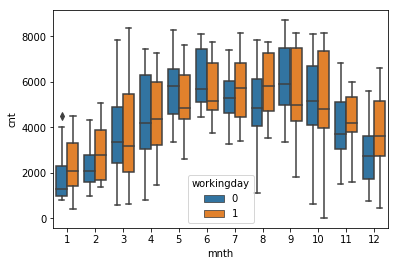

In [54]:
sns.boxplot("mnth", "cnt", "workingday", data = df)

## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Допустим, что мы имеем столбец отклонения ощущаемой температуры от действительной. Тогда корреляция признака скорости ветра и столбца отклонений даст нам понять насколько эти величины взаимосвязанны

Судя по полученной корреляции, связь между величинами имеется. Тем не менее, она не так высока. График распределения отклонения ощущаемой температуры от действительной относительно скорости ветра подтверждает данное утверждение.

Тем не менее прямой взаимосвязи между этими величинами нет, а значит далеко не всегда, когда на улице более сильный ветер, человек ощущает, что на улице холоднее

0.26017946703587924

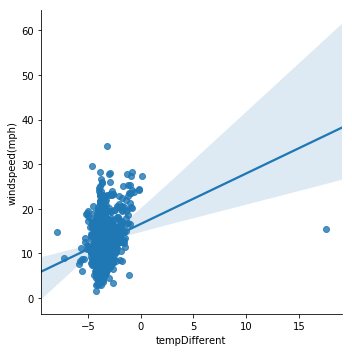

In [69]:
weather = df
weather["tempDifferent"] = df.temp - df.atemp
sns.lmplot("tempDifferent", "windspeed(mph)", data = weather)
corr = np.corrcoef(weather["tempDifferent"], weather["windspeed(mph)"])
corr[1,0]